In [1]:
import pandas as pd
from FixturesOdds import FixturesOdds
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import FootballClf

In [5]:
%load_ext autoreload 
%autoreload 2

ImportError: No module named 'autoreload '

In [6]:
%matplotlib inline

In [7]:
def applic_odds(row):
    
    if row['prediction'] != row['HomeTeamResult']:
        return 0
    elif row['HomeTeamResult'] == 'W' :
        return row['HomeOdds']
    elif row['HomeTeamResult'] =='D':
        return row['DrawOdds']
    else:
        return row['AwayOdds']

def gen_report(fix):

    grouper = fix.df.groupby(fix.df.FixtureDateAsDate.dt.strftime('%Y-%W'))
    df = pd.DataFrame(grouper.applic_odds.sum())
    df['stake'] = grouper.stake.sum()
    df['weeklyprofit']=df.applic_odds + df.stake
    df['betting_account'] = df.weeklyprofit.cumsum()
    return df



In [30]:
disp_cols=['FixtureDateAsDate','HomeTeam', 'AwayTeam', 'prediction', 'HomeOdds', 
           'DrawOdds', 'AwayOdds', 'HomeTeamResult', 'stake', 'applic_odds', 'weeklyprofit']

In [46]:
fix_pred=FixturesOdds()
fix_pred.fix_load('vwCSV_3','vwCSV_3.csv', False) # no reresh
fix_pred.do_calcs()
fix_pred.clean_predict()

In [47]:
#which fixtures are we going to model?
fix_pred.filter_by_col('season',2018).filter_by_col('leagueid',1)

In [48]:
X=fix_pred.X()
c=FootballClf.FootballClf()
clf=c.load_by_name('betting clf_2.1')

In [49]:
fix_pred.df['prediction'] = clf.predict(X)

In [50]:
fix_pred.df['stake']=-1
fix_pred.df['applic_odds'] = fix_pred.df.apply(applic_odds, axis=1) #decide on payout
fix_pred.df['weeklyprofit']=fix_pred.df.applic_odds + fix_pred.df.stake

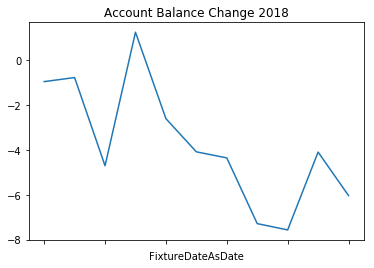

In [51]:
gen_report(fix_pred).betting_account.plot(title='Account Balance Change %s' % fix_pred.df.FixtureDateAsDate.dt.year.min())

In [52]:
df=gen_report(fix_pred)
df['pct_return']=-df.weeklyprofit/df.stake
df

,applic_odds,stake,weeklyprofit,betting_account,pct_return
FixtureDateAsDate,,,,,
2018-33,8.04,-9,-0.96,-0.96,-0.106667
2018-34,10.18,-10,0.18,-0.78,0.018000
2018-35,7.07,-11,-3.93,-4.71,-0.357273
2018-37,14.95,-9,5.95,1.24,0.661111
2018-38,7.15,-11,-3.85,-2.61,-0.350000
2018-39,7.52,-9,-1.48,-4.09,-0.164444
2018-40,10.73,-11,-0.27,-4.36,-0.024545
2018-42,6.07,-9,-2.93,-7.29,-0.325556
2018-43,9.72,-10,-0.28,-7.57,-0.028000


In [61]:
def gen_clf_report(fix, clf):

    X=fix.X()
    fix.df['prediction'] = clf.predict(X)
    fix.df['stake']=-1
    fix.df['applic_odds'] = fix_pred.df.apply(applic_odds, axis=1) #decide on payout
    fix.df['weeklyprofit']=fix_pred.df.applic_odds + fix_pred.df.stake

    grouper = fix.df.groupby(fix.df.FixtureDateAsDate.dt.strftime('%Y-%W'))
    df = pd.DataFrame(grouper.applic_odds.sum())
    df['stake'] = grouper.stake.sum()
    df['weeklyprofit']=df.applic_odds + df.stake
    df['betting_account'] = df.weeklyprofit.cumsum()
    return df


In [62]:
fix_pred=FixturesOdds()
fix_pred.fix_load('vwCSV_3','vwCSV_3.csv', False) # no reresh
fix_pred.do_calcs()
fix_pred.clean_predict()


In [63]:
fix_pred.filter_by_col('season',2018).filter_by_col('leagueid',1)

In [64]:
c=FootballClf.FootballClf()
clf=c.load_by_name('betting clf_2.1')

In [65]:
rpt_df=gen_clf_report(fix_pred, clf)

In [66]:
rpt_df

,applic_odds,stake,weeklyprofit,betting_account
FixtureDateAsDate,,,,
2018-33,8.04,-9,-0.96,-0.96
2018-34,10.18,-10,0.18,-0.78
2018-35,7.07,-11,-3.93,-4.71
2018-37,14.95,-9,5.95,1.24
2018-38,7.15,-11,-3.85,-2.61
2018-39,7.52,-9,-1.48,-4.09
2018-40,10.73,-11,-0.27,-4.36
2018-42,6.07,-9,-2.93,-7.29
2018-43,9.72,-10,-0.28,-7.57


In [53]:
df.pct_return.mean()

-0.0425619834710744

In [54]:
fix_pred.df['wk_no']=fix_pred.df.FixtureDateAsDate.dt.strftime('%Y-%W')

In [55]:
fix_pred.df[fix_pred.df.wk_no=='2018-45'][disp_cols]

,FixtureDateAsDate,HomeTeam,AwayTeam,prediction,HomeOdds,DrawOdds,AwayOdds,HomeTeamResult,applic_odds,weeklyprofit
1302,2018-11-05,Huddersfield Town,Fulham,W,2.25,3.30,3.30,W,2.25,1.25
9371,2018-11-10,Cardiff City,Brighton & Hove Albion,W,2.50,3.10,3.10,W,2.50,1.50
11268,2018-11-10,Southampton,Watford,W,2.40,3.30,3.00,D,0.00,-1.00
10958,2018-11-10,Huddersfield Town,West Ham United,L,3.40,3.20,2.25,D,0.00,-1.00
8977,2018-11-10,Leicester City,Burnley,W,1.48,4.33,7.00,D,0.00,-1.00
10590,2018-11-10,Crystal Palace,Tottenham Hotspur,L,4.50,3.70,1.80,L,1.80,0.80
8997,2018-11-10,Newcastle United,AFC Bournemouth,L,2.75,3.30,2.60,W,0.00,-1.00
3339,2018-11-11,Arsenal,Wolverhampton Wanderers,W,1.60,4.10,5.50,D,0.00,-1.00
10185,2018-11-11,Manchester City,Manchester United,W,1.40,5.00,7.50,W,1.40,0.40
1305,2018-11-11,Liverpool,Fulham,W,1.11,9.50,23.00,W,1.11,0.11


In [44]:
fix_pred.df[fix_pred.df.wk_no=='2018-45'].weeklyprofit.sum()

0.81

In [149]:
# do week commencing
fix=FixturesOdds()
fix.fix_load('vwCSV_3','vwCSV_3.csv', True) # no reresh
fix.df.sort_values('FixtureDateAsDate', inplace=True)
fix.do_calcs()
#fix.clean_predict()

In [107]:
fix.add_live_odds('skybet', int(1),predictday)

NameError: name 'leagueid' is not defined

In [152]:
#which fixtures are we going to model?
fix.filter_by_col('season',2018).filter_by_col('leagueid',1)

In [151]:
fix.df[fix.df.FixtureDateAsDate.isin(['2018-11-03', '2018-11-04'])][['FixtureDateAsDate','HomeTeam', 'AwayTeam', 'HomeOdds']]

,FixtureDateAsDate,HomeTeam,AwayTeam,HomeOdds
788,2018-11-03,Cardiff City,Leicester City,3.60
7601,2018-11-03,Arsenal,Liverpool,3.50
10763,2018-11-03,West Ham United,Burnley,1.75
10417,2018-11-03,Newcastle United,Watford,2.65
7306,2018-11-03,AFC Bournemouth,Manchester United,3.60
10185,2018-11-03,Everton,Brighton & Hove Albion,1.57
2811,2018-11-03,Wolverhampton Wanderers,Tottenham Hotspur,3.00
9957,2018-11-04,Chelsea,Crystal Palace,1.26
8638,2018-11-04,Manchester City,Southampton,1.11


In [119]:
fix.df[fix.df.FixtureDateAsDate.isin(['2018-11-03'])][['FixtureDateAsDate','HomeTeam', 'AwayTeam']]

,FixtureDateAsDate,HomeTeam,AwayTeam
3055,2018-11-03,Wolverhampton Wanderers,Tottenham Hotspur
1127,2018-11-03,Cardiff City,Leicester City
7876,2018-11-03,Arsenal,Liverpool
7762,2018-11-03,AFC Bournemouth,Manchester United
10185,2018-11-03,Everton,Brighton & Hove Albion
10763,2018-11-03,West Ham United,Burnley
10417,2018-11-03,Newcastle United,Watford


In [122]:
s='2013-10-01'
print (type(s)==str)

True


In [125]:
s=['2013-10-01','2013-10-02']
print (type(s)==list)

True


In [126]:
def filter_by_col(df, column,val):
    if type(val)==list:
        return df[df[column].isin(val)]
    else:
        return df[df[column] == val]
    

In [129]:
sum_col=['FixtureDateAsDate','HomeTeam', 'FTHG', 'AwayTeam']

In [145]:
fix.filter_by_col('FixtureDateAsDate', ['2018-11-03','2018-11-04'])

ValueError: operands could not be broadcast together with shapes (10777,) (2,) 

In [141]:
fix.df['FixtureDateAsDate'].isin (['2018-11-03','2018-11-04'])

3055     True
1127     True
6516     True
3275     True
313      True
10647    True
3702     True
6068     True
6810     True
7321     True
3860     True
7106     True
2290     True
7214     True
7876     True
5328     True
7762     True
6356     True
2630     True
9599     True
1184     True
6310     True
4717     True
409      True
3573     True
10185    True
10763    True
4104     True
1693     True
4709     True
10417    True
8707     True
2027     True
8179     True
5250     True
8414     True
6099     True
5794     True
3311     True
Name: FixtureDateAsDate, dtype: bool

In [110]:
fix.filter_by_col('FixtureDateAsDate','2018-11-03')

In [111]:
fix.X()

array([[ 2.23872114,  1.        ,  1.        ,         nan,         nan,
                nan],
       [ 0.41209752,  2.        ,  2.        ,         nan,         nan,
                nan],
       [ 0.3758374 , -1.        , -1.        ,         nan,         nan,
                nan],
       [ 0.70388223, -2.        , -1.        ,         nan,         nan,
                nan],
       [ 0.44411966,  1.        , -1.        ,         nan,         nan,
                nan],
       [ 0.89639619,  1.        ,  0.        ,         nan,         nan,
                nan],
       [ 0.59566214,  1.        ,  0.        ,         nan,         nan,
                nan]])

In [100]:
fix.df['prediction'] = clf.predict(fix.X())


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [80]:
fix.df = fix.df[fix.df['FixtureDateAsDate']>'2018-11-01']
fix.df = fix.df[fix.df['FixtureDateAsDate']<'2018-12-01']


In [99]:
fix.df[['FixtureDateAsDate','HomeTeam', 'FTHG', 'AwayTeam']].tail(15)
#df.FixtureDateAsDate=pd.to_datetime(df.FixtureDateAsDate)-pd.to_timedelta(7, unit='d')

,FixtureDateAsDate,HomeTeam,FTHG,AwayTeam
7791,2018-11-03,AFC Bournemouth,1.0,Manchester United
7936,2018-11-03,Arsenal,1.0,Liverpool
1002,2018-11-03,Cardiff City,0.0,Leicester City
10181,2018-11-03,Everton,3.0,Brighton & Hove Albion
10759,2018-11-03,West Ham United,4.0,Burnley
2752,2018-11-03,Wolverhampton Wanderers,2.0,Tottenham Hotspur
10413,2018-11-03,Newcastle United,1.0,Watford


In [53]:
df.sort_values('FixtureDateAsDate', inplace=True)
df.FixtureDateAsDate.tail()

1001    2018-10-20
8413    2018-10-20
9952    2018-10-20
10180   2018-10-21
7935    2018-10-22
Name: FixtureDateAsDate, dtype: datetime64[ns]

In [153]:
df['stake']=-1
df['applic_odds'] = df.apply(applic_odds, axis=1) #decide on payout
df['weeklyprofit']=df.applic_odds + df.stake

In [154]:
df=df.groupby([pd.Grouper(key='FixtureDateAsDate', freq='W-MON')])['weeklyprofit'].sum().reset_index()

In [155]:
df.sort_values('FixtureDateAsDate', inplace=True)
df[['FixtureDateAsDate','stake', 'weeklyprofit']].tail()

KeyError: "['stake'] not in index"

In [18]:

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

In [19]:

s = df.style.applymap(color_negative_red)
df.style.format({"pct_return":"{:.0%}"})

,applic_odds,stake,weeklyprofit,betting_account,pct_return
FixtureDateAsDate,,,,,
2018-33,8.04,-9,-0.96,-0.96,-11%
2018-34,10.18,-10,0.18,-0.78,2%
2018-35,9.92,-11,-1.08,-1.86,-10%
2018-37,14.95,-9,5.95,4.09,66%
2018-38,7.15,-11,-3.85,0.24,-35%
2018-39,7.52,-9,-1.48,-1.24,-16%
2018-40,10.73,-11,-0.27,-1.51,-2%
2018-42,8.52,-9,-0.48,-1.99,-5%
2018-43,9.72,-10,-0.28,-2.27,-3%


In [20]:
df.weeklyprofit.mean()/(-1.0*df.stake.mean())

0.042752293577981666

In [21]:
fix_pred.df[disp_cols].tail(15)

,FixtureDateAsDate,HomeTeam,AwayTeam,prediction,HomeOdds,DrawOdds,AwayOdds,HomeTeamResult,stake,applic_odds,weeklyprofit
9076,2018-11-03,West Ham United,Burnley,W,1.75,3.60,5.00,W,-1,1.75,0.75
10562,2018-11-03,Wolverhampton Wanderers,Tottenham Hotspur,L,3.00,3.30,2.40,L,-1,2.40,1.40
9324,2018-11-04,Chelsea,Crystal Palace,W,1.26,6.00,11.50,W,-1,1.26,0.26
10537,2018-11-04,Manchester City,Southampton,W,1.11,9.75,21.00,W,-1,1.11,0.11
1302,2018-11-05,Huddersfield Town,Fulham,W,2.25,3.30,3.30,W,-1,2.25,1.25
9371,2018-11-10,Cardiff City,Brighton & Hove Albion,W,2.50,3.10,3.10,W,-1,2.50,1.50
11268,2018-11-10,Southampton,Watford,W,2.40,3.30,3.00,D,-1,0.00,-1.00
10958,2018-11-10,Huddersfield Town,West Ham United,L,3.40,3.20,2.25,D,-1,0.00,-1.00
8977,2018-11-10,Leicester City,Burnley,W,1.48,4.33,7.00,D,-1,0.00,-1.00
10590,2018-11-10,Crystal Palace,Tottenham Hotspur,L,4.50,3.70,1.80,L,-1,1.80,0.80


In [ ]:
#extra stuff

In [282]:
oddslist=['HomeOdds','DrawOdds', 'AwayOdds']
fix.df[oddslist].mean()

HomeOdds    2.470499
DrawOdds    3.528682
AwayOdds    3.713422
dtype: float64

In [114]:
size=400
df2=pd.DataFrame()
df2['fixdate']=pd.date_range(start='1/1/2018', periods=size)
df2['HomeOdds']=np.random.normal(1.8, 0.3,size=size)
df2['DrawOdds']=np.random.normal(3.1, 0.6,size=size)
df2['AwayOdds']=np.random.normal(2.2, 0.8,size=size)
df2['Result']=np.random.choice(['W','D','L'], size)
df2['prediction']=df2[oddslist].idxmin(axis=1).map({'HomeOdds':'W', 'DrawOdds':'D', 'AwayOdds':'L'})

df2['min_odds']=df2[oddslist].min(axis=1)
df2['stake']=-1
df2['payoff'] = np.where(df2['Result']==df2['prediction'],df2['min_odds'] , 0)
df2.head(10)

,fixdate,HomeOdds,DrawOdds,AwayOdds,Result,prediction,min_odds,stake,payoff
0,2018-01-01,1.538369,2.366103,2.297300,L,W,1.538369,-1,0.000000
1,2018-01-02,1.593540,4.062548,2.403764,L,W,1.593540,-1,0.000000
2,2018-01-03,1.989621,3.613715,2.228707,W,W,1.989621,-1,1.989621
3,2018-01-04,1.475949,2.623604,3.107861,L,W,1.475949,-1,0.000000
4,2018-01-05,1.786615,2.139673,2.420279,D,W,1.786615,-1,0.000000
5,2018-01-06,1.858807,3.493159,2.403025,D,W,1.858807,-1,0.000000
6,2018-01-07,1.616708,2.846147,4.231335,W,W,1.616708,-1,1.616708
7,2018-01-08,1.522520,2.848603,2.365399,W,W,1.522520,-1,1.522520
8,2018-01-09,1.735599,3.015244,1.713221,L,L,1.713221,-1,1.713221
9,2018-01-10,2.092888,3.722471,1.076603,L,L,1.076603,-1,1.076603


In [310]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MeanClassifier(BaseEstimator, ClassifierMixin):  
    """An example of classifier"""

    def __init__(self, intValue=0, stringParam="defaultValue", otherParam=None):
        """
        Called when initializing the classifier
        """
        self.intValue = intValue
        self.stringParam = stringParam

        # THIS IS WRONG! Parameters should have same name as attributes
        self.differentParam = otherParam 


    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.

        Note: assert is not a good choice here and you should rather
        use try/except blog with exceptions. This is just for short syntax.
        """

        assert (type(self.intValue) == int), "intValue parameter must be integer"
        assert (type(self.stringParam) == str), "stringValue parameter must be string"
        assert (len(X) == 20), "X must be list with numerical values."

        self.treshold_ = (sum(X)/len(X)) + self.intValue  # mean + intValue

        return self

    def _meaning(self, x):
        # returns True/False according to fitted classifier
        # notice underscore on the beginning
        return( True if x >= self.treshold_ else False )

    def predict(self, X, y=None):
        try:
            getattr(self, "treshold_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return([self._meaning(x) for x in X])

    def score(self, X, y=None):
        # counts number of values bigger than mean
        return(sum(self.predict(X))) 

In [316]:
mc=MeanClassifier()
mc.fit(X_train,y=[1 for i in range(21)] )

MeanClassifier(intValue=0, otherParam=None, stringParam='defaultValue')

In [317]:
mc.predict([8])

[False]

In [311]:
from sklearn.grid_search import GridSearchCV

X_train = [i for i in range(0, 100, 5)]  
X_test = [i + 3 for i in range(-5, 95, 5)]  
tuned_params = {"intValue" : [-10,-1,0,1,10]}

gs = GridSearchCV(MeanClassifier(), tuned_params)

# for some reason I have to pass y with same shape
# otherwise gridsearch throws an error. Not sure why.
gs.fit(X_test, y=[1 for i in range(20)])

gs.best_params_ # {'intValue': -10} # and that is what we expect :)  

AssertionError: X must be list with numerical values.

In [397]:
fix_pred=FixturesOdds()
fix_pred.fix_load('vwCSV_3','vwCSV_3.csv', False) # no reresh
#fix_pred.do_calcs()
#fix_pred.clean_predict()

In [404]:
fix_pred.filter_by_col('HomeTeamID', 75).filter_by_col('season',2018).df[disp_cols]

KeyError: "['prediction' 'stake' 'applic_odds' 'weeklyprofit'] not in index"

In [406]:
fix_pred.df[fix_pred.df.FixtureID==9631]['HomeTeam']

6798    Brighton & Hove Albion
Name: HomeTeam, dtype: object

In [405]:
fix_pred.get_odds('ladbrokes',1)

,HomeTeam,HomeOdds,DrawOdds,AwayOdds
0,Southampton,2.00,3.25,4.00
1,Liverpool,1.11,10.00,23.00
2,Fulham,2.80,3.60,2.38
3,Brighton and Hove Albion,3.40,3.00,2.30
4,Watford,1.73,3.40,5.50
5,Leicester City,2.10,3.30,3.50
6,Crystal Palace,4.33,3.90,1.75
7,Burnley,9.50,4.75,1.36
8,Manchester United,1.73,3.70,4.60
9,Tottenham Hotspur,4.60,3.90,1.70
